In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from metpy.interpolate import interpolate_to_points
from resonance import plotting


plt.style.use('ncb.mplstyle')

# Load behavioral data and make PPF

In [2]:
df = pd.read_excel('dat/ppf.xls', sheet_name='PPF_margins', usecols='A:J')

x = df['PDUR'].values
y = df['PPAU'].values
z = df['rXY'].values

max_len = 20.0

duri0 = paui0 = np.arange(0, max_len + 0.1, 0.5)
duri, paui = np.meshgrid(duri0,paui0)

points = np.array([x + np.random.randn(*x.shape)/1_000, y+ np.random.randn(*y.shape)/1_000]).T
new_points = np.array([duri, paui]).T.reshape((-1, 2))

ppf = interpolate_to_points(points, z, new_points, interp_type='natural_neighbor', minimum_neighbors=3)
ppf = np.maximum(ppf, 0)
ppf = ppf.reshape((len(duri), len(paui))).T
ppf.shape

(41, 41)

### PPF with stimuli

/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_90812/2284159091.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cax = plt.colorbar(label='Phonotaxis', fraction=0.02, pad=0.03)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


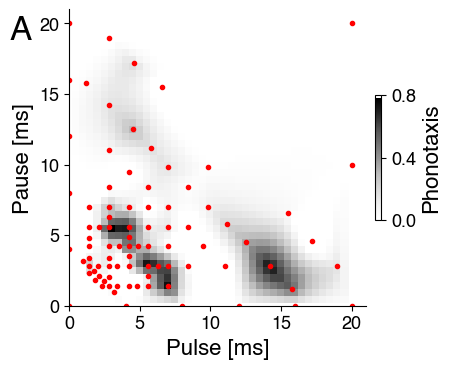

In [3]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(121)
plt.pcolor(duri, paui, ppf, cmap='Greys')
plt.plot(x, y, '.r')
plt.axis('square')
plt.xlim(0, 21)
plt.ylim(0, 21)
plt.xlabel('Pulse [ms]')
plt.ylabel('Pause [ms]')
plt.xticks(np.arange(0, 20.1, 5))
plt.yticks(np.arange(0, 20.1, 5))
cax = plt.colorbar(label='Phonotaxis', fraction=0.02, pad=0.03)
cax.set_ticks(np.arange(0, 0.81, 0.4))

plotting.label_axes()
plt.tight_layout()

plt.savefig('fig/Fig_anuro_ppf_with_stims.pdf')

### PPF plus transects

/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_90812/1244405980.py:47: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.clim(0, 0.8)
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_90812/1244405980.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


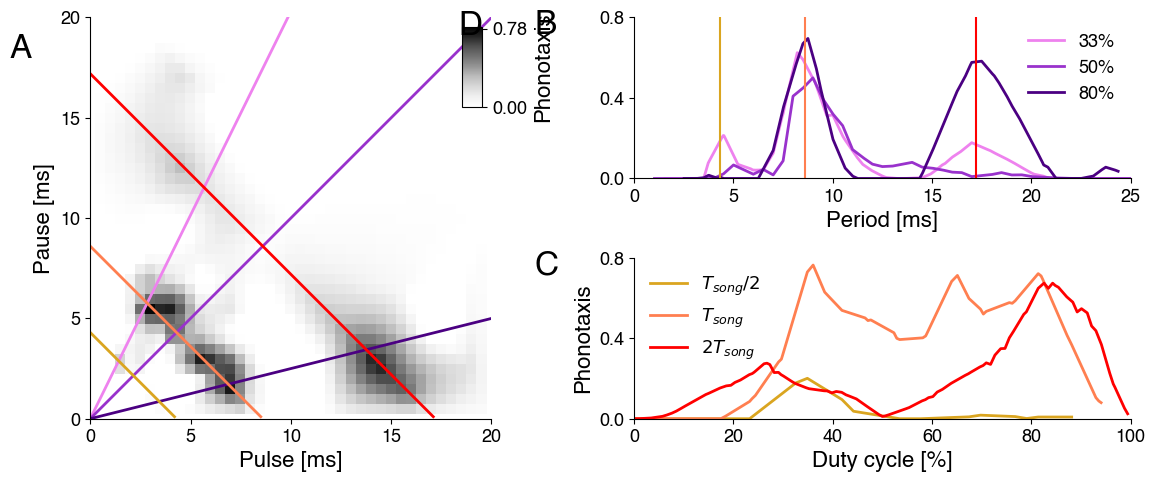

In [4]:
fig, axs = plt.subplot_mosaic(
    '''
    AB
    AC
    ''',
    figsize=(12, 5) )

plotting.ppf(duri, paui, ppf, ax=axs['A'])

col_dc = ['violet', 'darkorchid', 'indigo']
col_per = ['goldenrod', 'coral', 'red']
periods = [4.3, 8.6, 17.2]

# period transects
plt.sca(axs['B'])
for dc, col in zip([0.33, 0.5, 0.8], col_dc):
    dur = np.arange(0, max_len+0.1, 0.01)
    pau = dur / dc - dur
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs['A'].plot(dur, pau, c=col, linewidth=2)
    plt.plot(pau+dur, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'{int(dc*100)}%', linewidth=2.0)
plt.xlabel('Period [ms]')
for p, c in zip(periods, col_per):
    plt.axvline(p, c=c)
plt.xlim(0, 25)
plt.ylim(0)
plt.yticks([0, 0.4, 0.8])
plt.legend(frameon=False)

# DC transects
plt.sca(axs['C'])
per = 10
for per, per_label, col in zip(periods, ['$T_{song}/2$', '$T_{song}$', '$2T_{song}$'], col_per):
    pau = np.arange(0.1, per, 0.01)
    dur = per - pau
    dc = dur / per
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs['A'].plot(dur, pau, c=col, linewidth=2)
    plt.plot(dc * 100, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'{per_label}', linewidth=2.0)
plt.xlabel('Duty cycle [%]')
plt.ylabel('Phonotaxis')
plt.xlim(0, 100)
plt.ylim(0)
plt.yticks([0, 0.4, 0.8])
plt.clim(0, 0.8)
plt.legend(frameon=False)

plotting.label_axes()
plt.tight_layout()

plt.savefig('fig/Fig_anuro.pdf')